### Import all the libraries


In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name="data")

In [6]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
df.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### There isn't any Null values in the above data

In [7]:
#normalising the data
#transforming each feature such that it has a mean of zero and a standard deviation of one.
# Select the features to scale
X = df[['Balance', 'Qual_miles', 'cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]

# Normalize the data
X_scaled = (X - X.min()) / (X.max() - X.min())

In [8]:
X_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

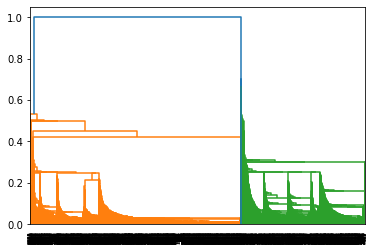

<Figure size 1080x1080 with 0 Axes>

In [14]:
#creating dendrogram
dendrogram=sch.dendrogram(sch.linkage(X_scaled, method='single'))
plt.figure(figsize=(15,15))
plt.show

In [15]:
hc=AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage= 'single')
hc

AgglomerativeClustering(linkage='single')

### implementing KMeans clustering

### Finding optimum number of cluster using wcss and elbow chart

In [17]:
wcss=[]

for i in range (1,11):
    Kmeans= KMeans(n_clusters=i, random_state=12)
    Kmeans.fit(X_scaled)
    wcss.append(Kmeans.inertia_)

C:\Users\G Govardhan Reddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=16.
  warnings.warn(


In [18]:
wcss

[1830.7932128584118,
 823.6756984125207,
 625.1684881570719,
 436.7088576193261,
 348.94332172541374,
 315.31532958213967,
 287.8951679905093,
 263.24789902028533,
 243.91664703659063,
 226.10812108252128]

### Plotting elbow graph

<function matplotlib.pyplot.show(close=None, block=None)>

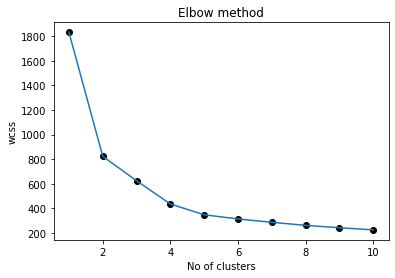

In [19]:
plt.plot(range (1,11), wcss)
plt.scatter(range (1,11), wcss, color='black')
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show

In [49]:
#There isn't much difference after 2, we will check with the other methods like silhouette score

In [20]:
#validating the Kvalue(optimal clusters) using silhouette score

from sklearn.metrics import silhouette_score as sil

from sklearn.cluster import KMeans

In [22]:
nc=[2,3,4,5,6,7,8,9,10]
iner=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(X_scaled)
    iner.append(sil(X_scaled,y))

<function matplotlib.pyplot.show(close=None, block=None)>

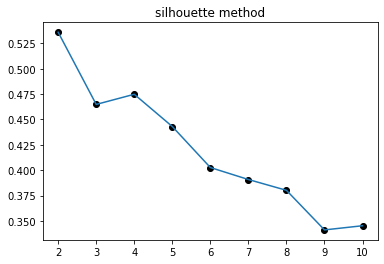

In [23]:
plt.plot(nc, iner)
plt.scatter(nc, iner, color='black')
plt.title("silhouette method")
plt.show

In [ ]:
#The silhouette method also points k=2

In [24]:
### Lets check with calinski_harabaz score

In [25]:
from sklearn.metrics import calinski_harabasz_score as chs


In [26]:
nc=[2,3,4,5,6,7,8,9,10]
iner=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(X_scaled)
    iner.append(chs(X_scaled,y))

<function matplotlib.pyplot.show(close=None, block=None)>

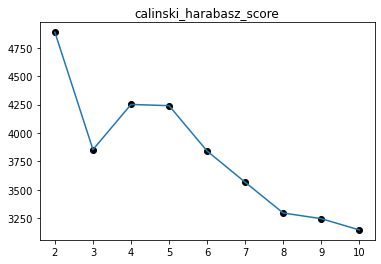

In [27]:
plt.plot(nc, iner)
plt.scatter(nc, iner, color='black')
plt.title("calinski_harabasz_score")
plt.show

In [ ]:
#calinski_harabasz_score also shows as 2. Therefore we are going to proceed with 2 clusters

In [28]:
cluster_new= KMeans(n_clusters=2, random_state=12)

In [29]:
cluster_new.fit(X_scaled)

KMeans(n_clusters=2, random_state=12)

In [30]:
cluster_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [31]:
df['KMeans_clusters']= cluster_new.labels_

In [32]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [33]:
df.groupby('KMeans_clusters').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
KMeans_clusters,,,,,,,,,,,,
0,1745.592843,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,2173.169182,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


In [50]:
#We can see that the cluster 0 has the customers with the balance whose mean is 97053, Qual_miles=240.196489, cc1_miles= 2.661715,cc2_miles=1.01553... with Award mean being 1
#Rest all the customers are in cluster 1

In [34]:
#performing DBSCAN

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [38]:
df.drop(['ID#'],axis=1,inplace=True)

In [39]:
dbs=DBSCAN(min_samples=2,eps=0.4)
class_pr=dbs.fit_predict(df)

In [40]:
df["class_pr"]=class_pr

In [41]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_clusters,class_pr
0,28143,0,1,1,1,174,1,0,0,7000,0,1,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,-1


In [42]:
set(class_pr)

{-1, 0}

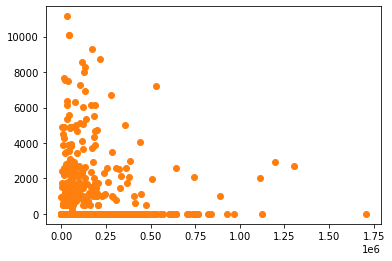

In [45]:
for i in set(class_pr):
    plt.scatter(df[df["class_pr"]==i].iloc[:,0],df[df["class_pr"]==i].iloc[:,1])

In [48]:
df[df['class_pr']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_clusters,class_pr
3370,1000,0,1,1,1,0,0,0,0,1597,0,1,0
3876,1000,0,1,1,1,0,0,0,0,1597,0,1,0
